<center>

Ukrainian Catholic University
  
Faculty of Applied Sciences

Data Science Master Programme
  
---
## *Interpretability of Fake Face Discrimination*
## Responsible Data Science final project
  


---


  
</center>

>

*Authors:*
- Anastasiia Khaburska
- Anton Shcherbyna
- Vadym Korshunov
- Yaroslava Lochman
</left>

<center>
  <img src="https://raw.githubusercontent.com/Anastasiia-Khab/responsible-ds-final-project/master/data/report_images/UCU-Apps.png" width="300">
</center>

<center>

12 May 2019
  
</center>

# Introduction

### 1. Problem statement

Face recognition systems are becoming more prevalent than ever. From face recognition on our iPhones/smartphones, to face recognition for mass surveillance, face recognition systems are being utilised everywhere.

However, face recognition systems are easily fooled by “non-real” faces.

After GANs were introduced in a paper by Ian Goodfellow and other researchers at the University of Montreal, in 2014, it became harder to distinguish AI-generated fakes from the genuine faces. These networks operate by poring through huge stacks of data (in this case, a lot of portraits of real people); learning the patterns within them, and then trying to replicate what they’ve seen. The reason GANs are so good is that they test themselves. One part of the network generates faces, and the other compares them to the training data. If discriminator can tell the difference, the generator is sent back to the drawing board to improve its work.

Hence, there is a need to understand what the discriminator can and cannot do, and thus interpret its actions for future improvements. Hypothetical interpretability framework can help human to understand prediction based on features that discriminator "saw" on the image.

Also, AI-generated fakes could be trouble, undermining society’s trust in evidence. This is the reason why the fake/real face detection systems should keep pace with the times.

### 2. Goal

There is a growing sense that neural networks need to provide transparency.

Explaining the output of a deep network remains a challenge.   In the case of an image classifier, one type of explanation is to identify pixels that strongly influence the final decision.  A starting point for this strategy is the gradient of the class score function with respect to the input image.  This gradient can be interpreted as a sensitivity map, and several techniques elaborate on this basic idea.  

### 3. Helicopter view

The project idea was inspired by Kaggle competition ["Real and Fake Face Detection"](https://www.kaggle.com/ciplab/real-and-fake-face-detection) organised by Department of Computer Science, Yonsei University.

We took StyleGAN - pretrained generator of fake faces - and StarGAN - pretrained discriminator of faces - and investigated behaviour of this discriminative CNN model for the Transparency and Interpretability goals. We interpreted the model's output on the fake generated images. To accomplish this task, we  explored the most popular feature visualisation techniques and tried a few of them implemented in Pytorch:

1.   Vanilla Backpropagation (with Smooth Gradient)
2.   Guided Backpropagation
3.  Gradient-weighted class activation mapping ([GradCAM](https://arxiv.org/pdf/1610.02391.pdf))

This notebook is an interactive report on our project.

All the code, we where working on, may be seen our [GitHub repository](https://github.com/Anastasiia-Khab/responsible-ds-final-project)

Also, a great help for us in understanding and implementing of CNN visualisation techniques 
was this GitHub repository with [PyTorch CNN Visualizations](https://github.com/utkuozbulak/pytorch-cnn-visualizations)

### 4. Designed framework properties

1. **Truthfulness**: the interpretation is easy to understand and can be used for a quick view of what convolutional neural network actually "see" Moreover, nowadays neural networks behave like a black boxes, so every visual state-of-the-art interpretation technique will be helpful for decision making. Easy understandable visualization is a key that helps to simplify neural networks internal world for qualitative perception by humans.
2. **Utility**: the interpretation helps to see details of how neural network works from inside, hence helps to argument (or discriminate) its output decision. For example, in our case we can see what features very useful to convolutional neural network to classify the fake or real faces. In some situations neural network "watched" on the eyes, skin, but in some cases on the background. 
3. **Understandability**: the interpretation concentrates attention on the zones in which neural network is the most active. The methods generated heat-maps can be covered on the image. Hence we can see which part of image is so essential for neural network. The resulted design is very simple, but effective and human-oriented.
4. The interpretations sometimes are **contrastive** and **counterfactual**, because we didn't regulate what neural network can "see" and what can't. For example, in our case discriminator can see on the background to determine fake face or not. Because generative part can produce good faces, but forget to detalize background, hence is existed a "hint" - region of interest, where model can easily determine the artificiality of face without information from face. The framework doesn't **emphase abnormality** of some input data, because on the current stage of development out interpretator can't decide whether the interpretation of the neural network is bad or good, or to determine the normality or abnormality of the input data. Now our framework can do only visualization of internal life of convolutional neural network, so the more sophisticated approaches will be our further research. 

# Theory under the hood

Formal definition of different methods for propagating an output activation out back through a ReLU activation in layer $l$:
<center>
$f_i^{l+1} = ReLU(f_i^l)=max(f_i^l,\ 0)$
</center>

**1) Vanilla Backpropagation:**

*   Visualize the gradient of a particular neuron with respect to the input x
*   Do a forward pass
*   Compute the gradient of a particular neuron using backprop

<center>
$R_i^l=(f_i^l>0) \cdot R_i^{l+1}$, where $R_i^{l+1}=\frac{\partial f^{out}}{\partial f_i^{l+1}}$
</center>

Mostly zero away from the object, but the results are not very satisfying, this is why we used SmothGrad to remove the noise and visually sharpen gradient-based sensitivity maps.

Several sensitivity maps are obtained by applying Gaussian noise $N(0, σ^2)$ to the input pixels of $n$ samples, and then the average is taken. The noise level corresponds to $\frac{σ}{x_{max}−x_{min}}$


**2) Guided Backpropagation:**

* Idea: neurons act like detectors of particular image features
* We are only interested in what image features the neuron detects, not in what kind of stuff it doesn’t detect
* So when propagating the gradient, we set all the negative gradients to 0
<center>
$R_i^l = (f_i^l>0) \cdot (R_i^{l+1}>0) \cdot R_i^{l+1}$
</center>

**3) Grad-CAM** (Gradient-weighted Class Activation Mapping): 

Uses the gradient information flowing into the last convolutional layer of the CNN to understand the importance of each neuron for a decision of interest.

CAM modifies the base network to remove all fully-connected layers at the end, and including a tensor product (followed by softmax), which takes as input the Global-Average-Pooled convolutional feature maps, and outputs the probability for each class.

<center>
  
![CAP](https://raw.githubusercontent.com/Anastasiia-Khab/responsible-ds-final-project/master/data/report_images/CAP.png)
  
</center>

To obtain the class-discriminative localization map, Grad-CAM computes the gradient of $y_c$ (score for class $c$) with respect to feature maps $A$ of a convolutional layer. These gradients flowing back are global-average-pooled to obtain the importance weights $α_{l}^c$:

<center>
$\alpha_l^c=\frac{1}{Z}\sum_i\sum_j\frac{\partial y^c}{\partial A_{ij}^l}$
</center>

Grad-CAM heat-map is a weighted combination of feature maps, but followed by a ReLU:

<center>
$L_{Grad-CAM}^c=ReLU(\sum_l \alpha_l^c A^l)$
</center>

The resulted heat-map has size equal to the size of feature map $A_l$, so it is upsampled to the size of input image resolution using bilinear interpolation technique.

<center>

![alt text](https://raw.githubusercontent.com/Anastasiia-Khab/responsible-ds-final-project/master/data/report_images/gradCAM.png)
  
</center>

# Interpretator at work

*Setting-up*

In [0]:
import os
import sys
from contextlib import contextmanager

@contextmanager
def silence_stdout():
    new_target = open(os.devnull, "w")
    old_target = sys.stdout
    sys.stdout = new_target
    try:
        yield new_target
    finally:
        sys.stdout = old_target

with silence_stdout():
  !sudo apt-get install git-lfs
  !git lfs install
  import os
  import sys

  if not os.path.split(os.getcwd())[1] == 'responsible-ds-final-project':
    !git clone https://github.com/Anastasiia-Khab/responsible-ds-final-project.git
    os.chdir('responsible-ds-final-project')
  else:
    !git pull

  import torch, torchvision
  from torchvision.models.alexnet import alexnet
  from torchvision.transforms import Compose, Resize, ToTensor

  import matplotlib.pyplot as plt
  %matplotlib inline

  from PIL import Image
  import numpy as np
  from matplotlib import pyplot as plt

*Loading the model to test the interpretation on, and an example image*

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth
100%|██████████| 244418560/244418560 [00:03<00:00, 80421985.08it/s]


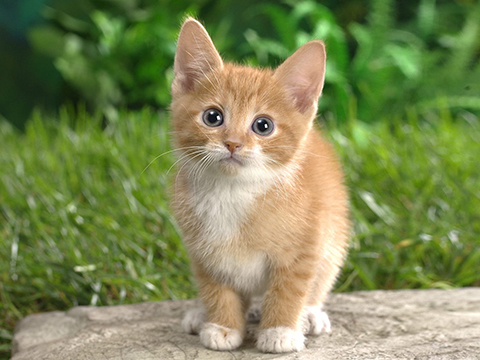

In [0]:
model = alexnet(pretrained=True)
  
sys.path.append('visual_interpretator')
from visual_interpretator import VisualInterpretator

cat = Image.open('data/imagenet_images/cute.jpg')
cat

*Testing our interpretator*

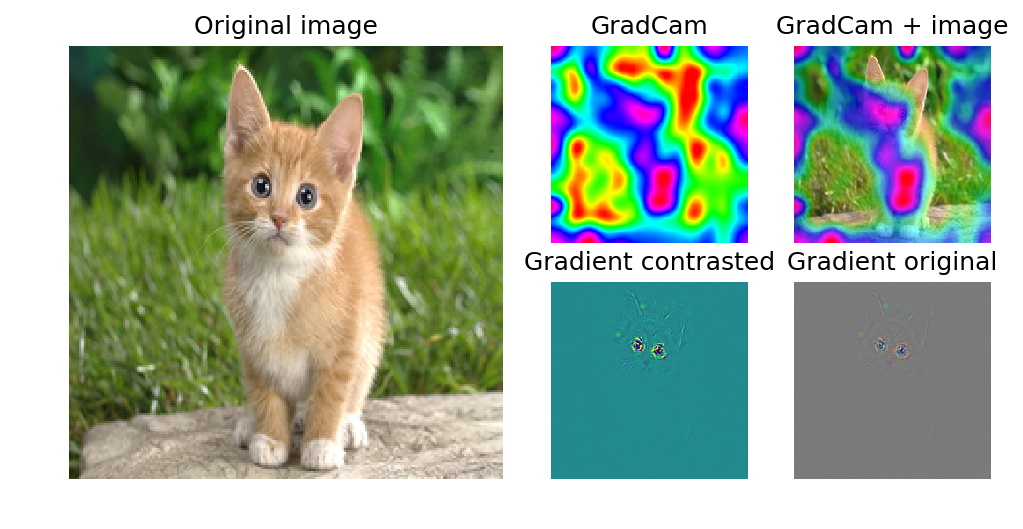

In [0]:
interpretator = VisualInterpretator(model, apply_transform=False)
cat = cat.resize((224, 224), Image.ANTIALIAS)
interpretator.visualization(cat, target_layer=6, target_class=281, figsize=(8, 8))

*So we are testing on the AlexNet classification network trained on the large scale ImageNet data. For the above example the model grabs reasonable features of the object such as eyes, ears, nose, body, and predicts based on it.*

# So how our model discriminates the fake faces?

*Let's generate some faces that don't exist and load real images*

How many fakes do you want to generate?
4


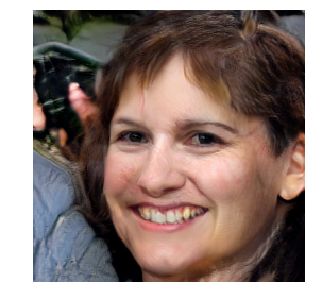

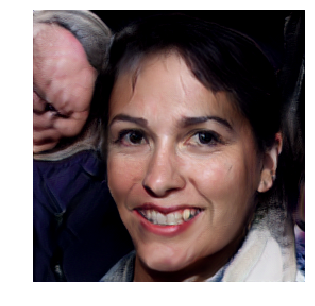

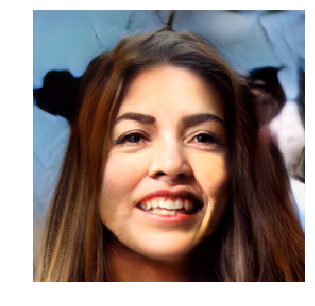

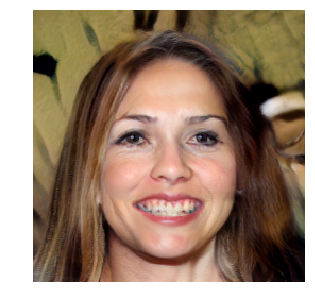

In [0]:
sys.path.append('stylegan_generator')
from stylegan_generator.generator import generate_fakes

num_fakes = int(input('How many fakes do you want to generate?\n'))
fakes = generate_fakes(num_fakes)

for fake in fakes:
  fig, ax = plt.subplots(figsize=(5, 5))
  _ = ax.imshow(fake)
  _ = ax.axis('off')

Real faces:


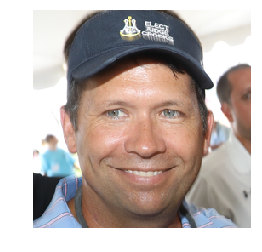

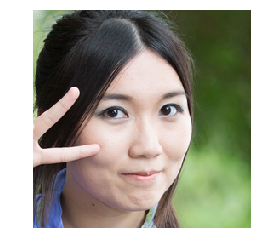

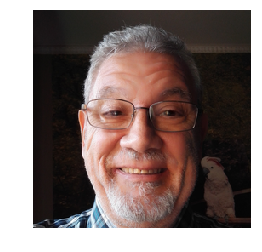

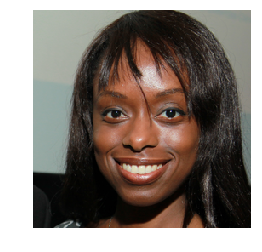

In [0]:
print('Real faces:')
reals = []
for fname in ['00011', '01218', '00554', '02140']:
  real = Image.open('./data/flickr_images/{}.png'.format(fname)).resize((256, 256), Image.ANTIALIAS)
  reals.append(real)
  plt.imshow(real)
  plt.axis('off')
  plt.show()

*Now we'll take the discriminator from the GAN, which was trained to produce such fakes, and we'll test it on those fake images*

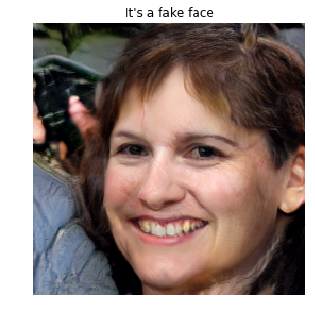

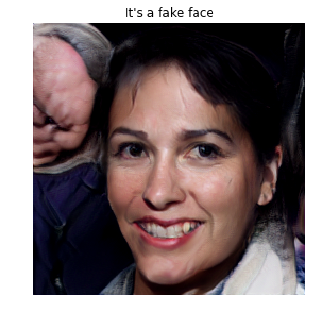

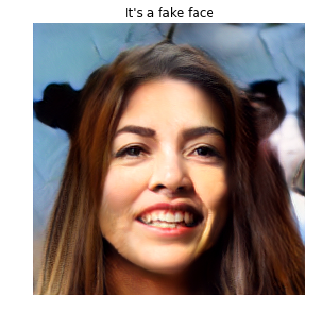

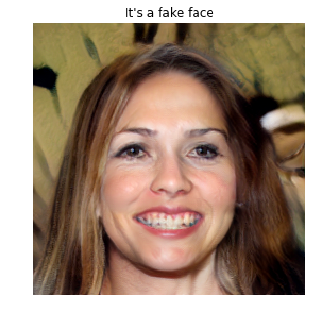

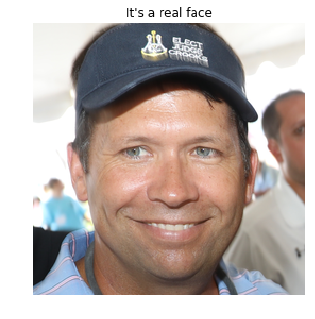

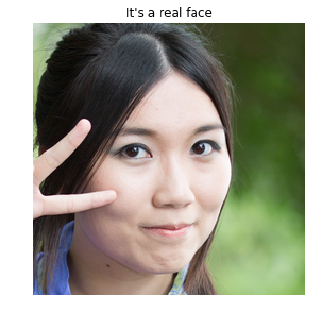

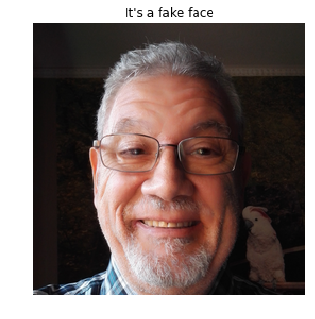

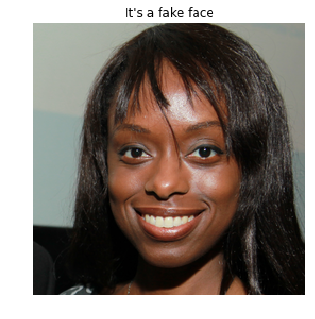

In [0]:
sys.path.append('stargan_discriminator')
from stargan_discriminator.discriminator import get_discriminator, discriminate

discriminator = get_discriminator()
preds = discriminate(fakes+reals, discriminator)

for fake, pred in zip(fakes+reals, preds):
  fig, ax = plt.subplots(figsize=(5, 5))
  _ = ax.imshow(fake)
  _ = ax.axis('off')
  
  if pred == 0:
    _ = ax.set_title('It\'s a fake face')
  else:
    _ = ax.set_title('It\'s a real face')
    

*And finally, let's see how discriminator decides whether the image is fake*

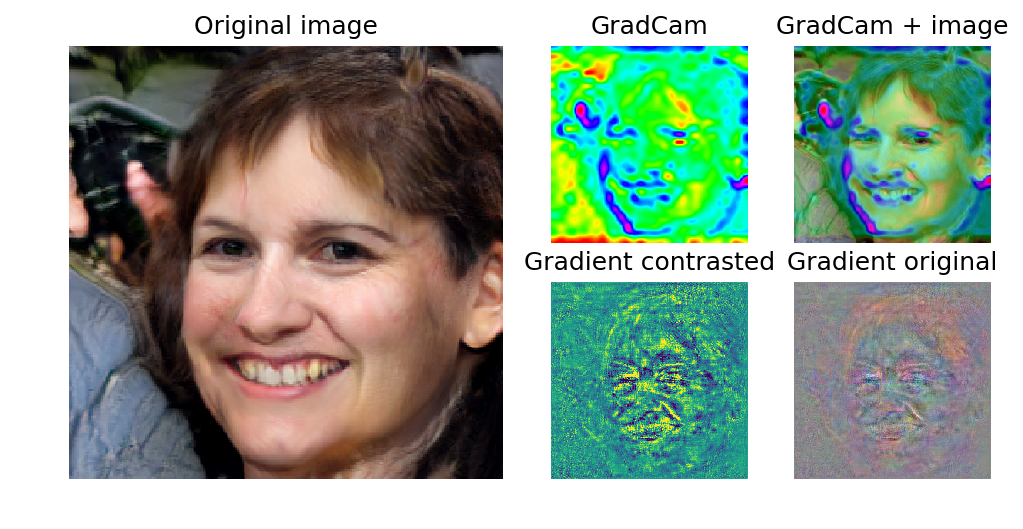

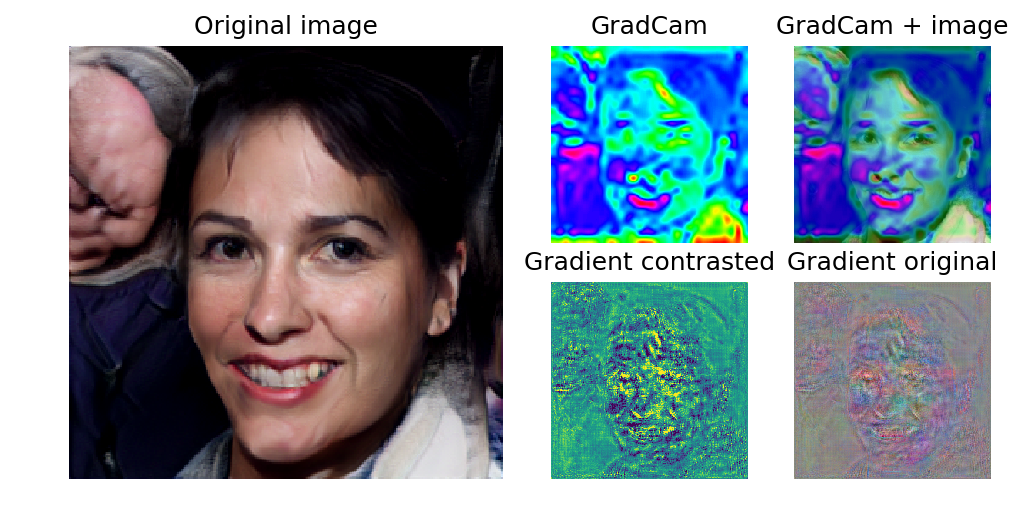

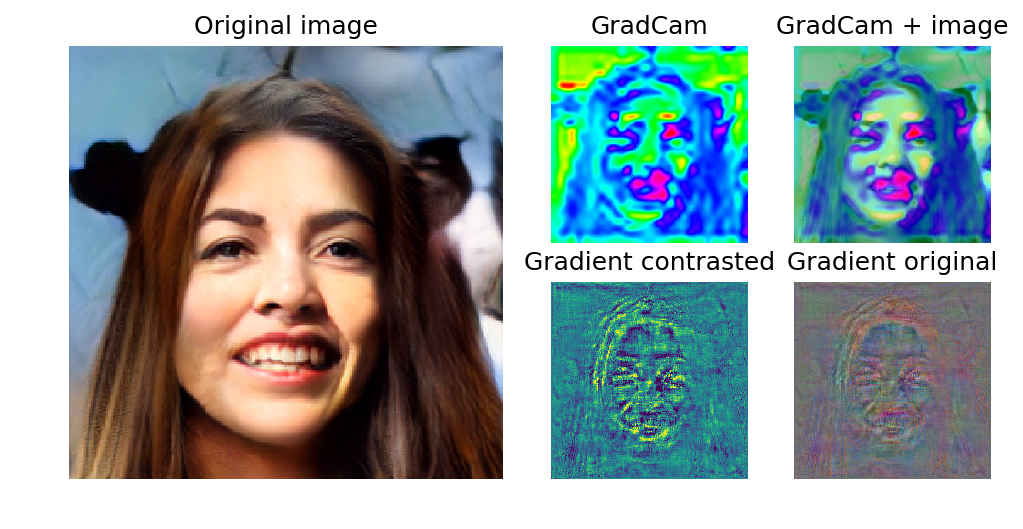

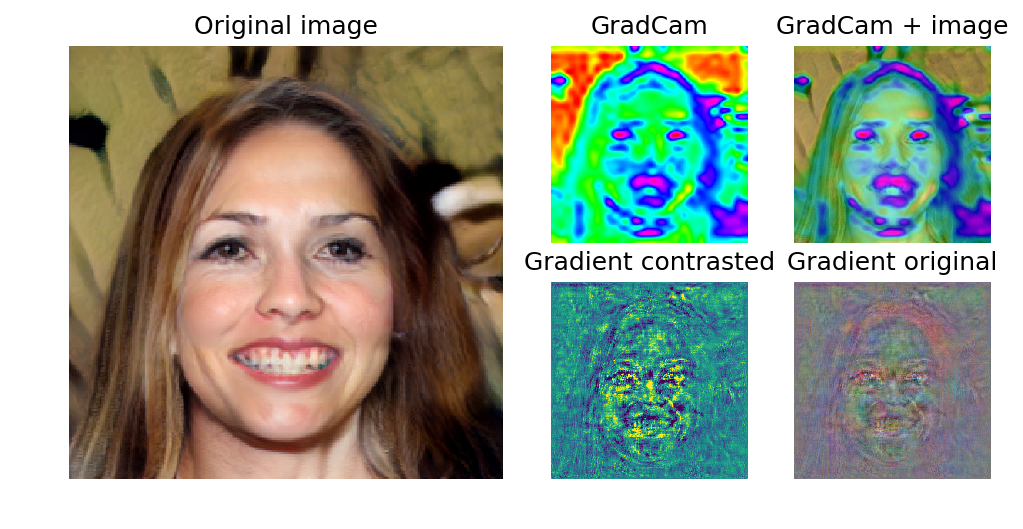

In [0]:
sys.path.append('visual_interpretator')
from stargan_discriminator.discriminator import get_modified_discriminator, transform
from visual_interpretator import VisualInterpretator

discriminator = get_modified_discriminator()
face_interpretator = VisualInterpretator(discriminator, transform, apply_transform=True)

for fake in fakes:
  face_interpretator.visualization(fake, target_layer=5, target_class=0, figsize=(8, 8))
  plt.show()

*We see, that the network pays attention to every part of the image. Where there are problems with the backgound, the network's activation is high there, on those images where the face edges or keypoints are not natural, it catches it, the same with the skin and hair*

*Next we look where discriminator activates on real face images*

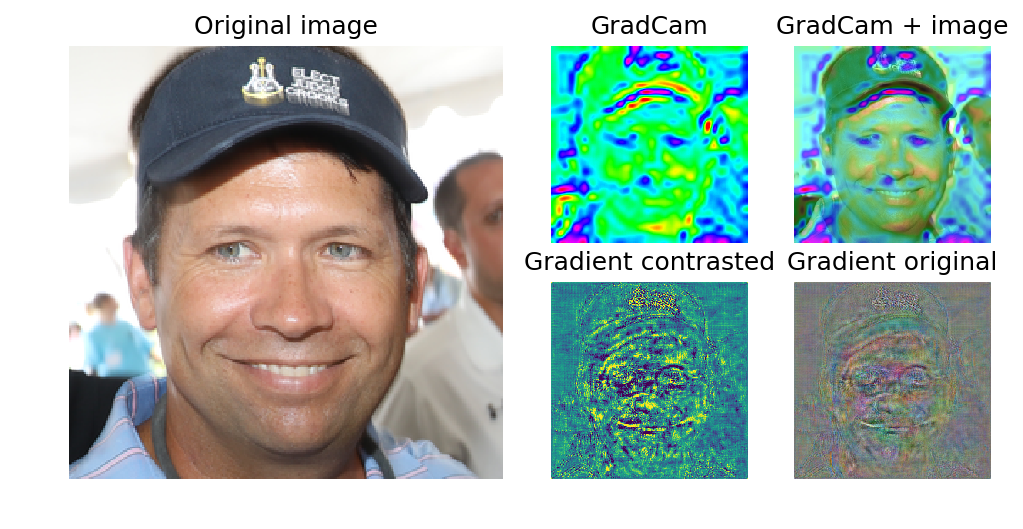

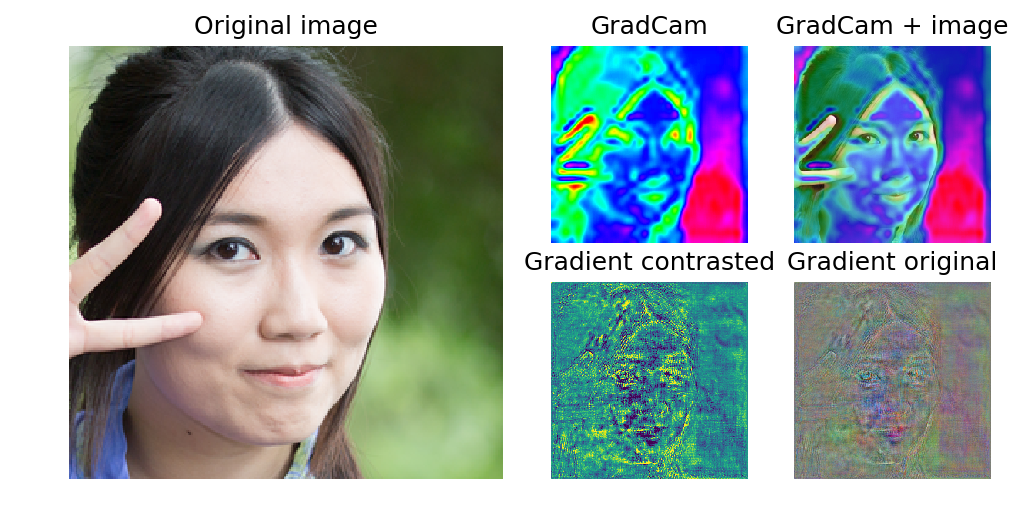

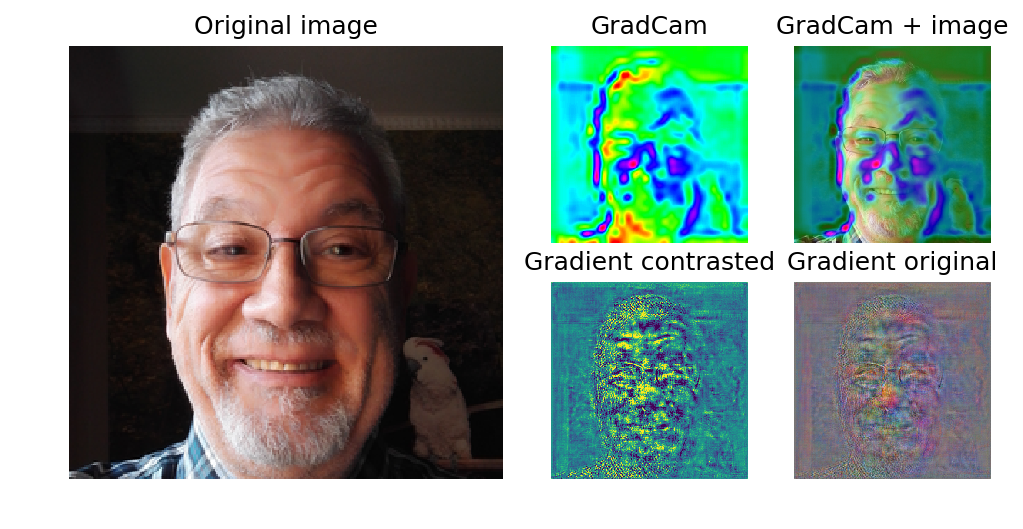

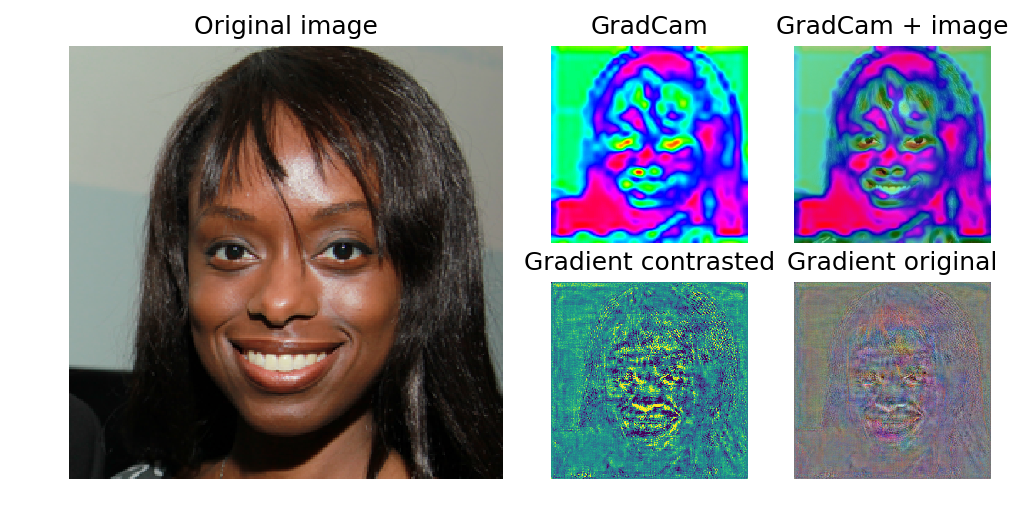

In [0]:
for i, real_image in enumerate(reals):
  face_interpretator.visualization(real_image, target_layer=5, target_class=preds[i-иlen(reals)], figsize=(8, 8))
  plt.show()

*For those examples where the model predictions were correct, it identifies overall structure as a base reason and the smooth clean background. For the rest — false negative examples — it activates on high lighting/shadow changes on the face, and on the skin which indicated its biasness and intolerance based on the skin color. The model must learn more from diverse examples, there were certainly not enough examples presented in the training set.*

# Conclusions

In this work, we focus on one of the most pressing challenges of Data science and particularly CNNs  - transparency and interpretability.  We explored the most popular feature visualisation techniques such as  Vanilla Backpropagation (with Smooth Gradient), Guided Backpropagation and Gradient-weighted class activation mapping.  These methods may be fundamental in understanding the inmportance and the influence of each layer, neuron, feature in CNN decision. This information is beneficial in conjugating Neural Network's FACT, i.e., questions related to Fairness, Accuracy, Confidentiality, and Transparency.

If working on TensorFlow from Google, there are great tools to visualise CNNs. For example:

1) [Activation Atlases](https://distill.pub/2019/activation-atlas/)

2) [What-If -Tool](https://pair-code.github.io/what-if-tool/)

Our team's members are more proficient in Pytorch. That is why we decided to create our pipeline to understand CNNs. We think that it is a great start. Also, we dream to implement something similar to Activation Atlases but in PyTorch as a future work.